Assignment Prob 1

In [1]:
#Loading Olivetti faces dataset
from sklearn import datasets
faces=datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/repl/scikit_learn_data


In [2]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [3]:
faces.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit
strat_split=StratifiedShuffleSplit(n_splits=1,test_size=40,random_state=42)
train_valid_idx, test_idx=next(strat_split.split(faces.data,faces.target))         #split function indicates index and next is used to read next element in the array
X_train_valid=faces.data[train_valid_idx]
y_train_valid=faces.target[train_valid_idx]
X_test=faces.data[test_idx]
y_test=faces.target[test_idx]

strat_split=StratifiedShuffleSplit(n_splits=1,test_size=80,random_state=42)
train_idx, valid_idx=next(strat_split.split(faces.data,faces.target))         #split function indicates index and next is used to read next element in the array
X_train=faces.data[train_idx]
y_train=faces.target[train_idx]
X_valid=faces.data[valid_idx]
y_valid=faces.target[valid_idx]

In [5]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(320, 4096)
(80, 4096)
(40, 4096)


In [6]:
#Dimensionality Reduction PCA
from sklearn.decomposition import PCA
pca=PCA(0.99)
X_train_pca=pca.fit_transform(X_train)
X_valid_pca=pca.transform(X_valid)
X_test_pca=pca.transform(X_test)

In [7]:
pca.n_components_

222

In [8]:
#Building kmeans model
from sklearn.cluster import KMeans
k_range=range(5,150,5)
kmeans_per_k=[]
for k in k_range:
    print('k=',k)
    kmeans=KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k= 5
k= 10
k= 15
k= 20
k= 25
k= 30
k= 35
k= 40
k= 45
k= 50
k= 55
k= 60
k= 65
k= 70
k= 75
k= 80
k= 85
k= 90
k= 95
k= 100
k= 105
k= 110
k= 115
k= 120
k= 125
k= 130
k= 135
k= 140
k= 145


In [19]:
#Finding out silhouette score
from sklearn.metrics import silhouette_score
import numpy as np

sil_scores=[silhouette_score(X_train_pca,model.labels_) for model in kmeans_per_k]
best_index=np.argmax(sil_scores)
best_k=k_range[best_index]
best_score=sil_scores[best_index]

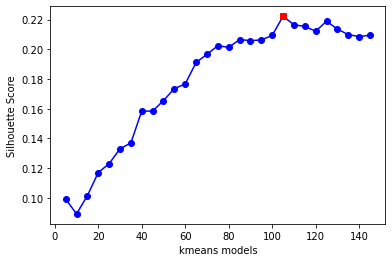

In [10]:
#plotting model vs their silhouette score
import matplotlib.pyplot as plt
plt.plot(k_range,sil_scores,'bo-')
plt.plot(best_k,best_score,'rs')
plt.xlabel('kmeans models')
plt.ylabel('Silhouette Score')
plt.show()

In [11]:
inertia_score=[model.inertia_ for model in kmeans_per_k]
best_inertia=inertia_score[best_index]

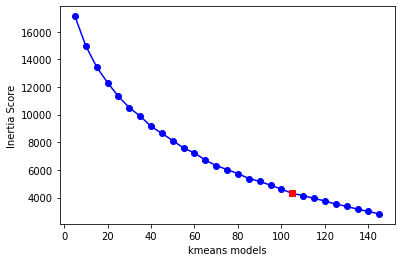

In [12]:
#plot models inertias
plt.plot(k_range,inertia_score,'bo-')
plt.plot(best_k,best_inertia,'rs')
plt.xlabel('kmeans models')
plt.ylabel('Inertia Score')
plt.show()

In [13]:
best_model=kmeans_per_k[best_index]

Cluster: 0


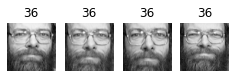

Cluster: 1


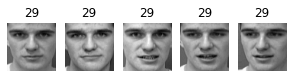

Cluster: 2


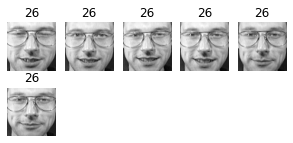

Cluster: 3


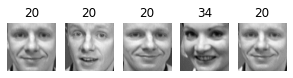

Cluster: 4


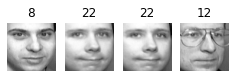

Cluster: 5


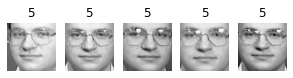

Cluster: 6


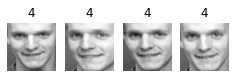

Cluster: 7


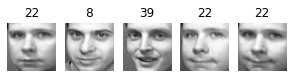

Cluster: 8


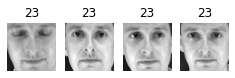

Cluster: 9


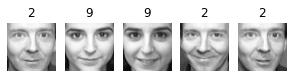

Cluster: 10


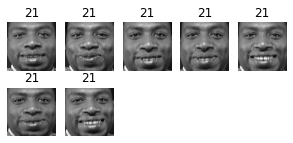

Cluster: 11


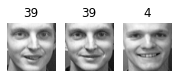

Cluster: 12


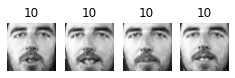

Cluster: 13


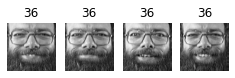

Cluster: 14


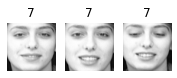

Cluster: 15


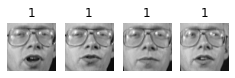

Cluster: 16


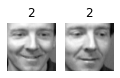

Cluster: 17


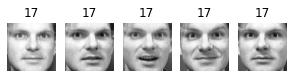

Cluster: 18


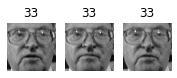

Cluster: 19


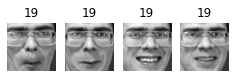

Cluster: 20


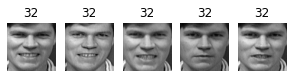

Cluster: 21


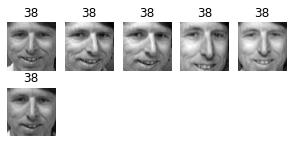

Cluster: 22


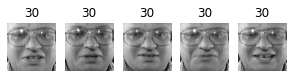

Cluster: 23


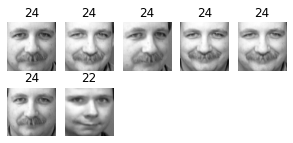

Cluster: 24


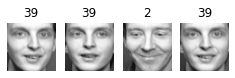

Cluster: 25


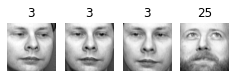

Cluster: 26


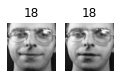

Cluster: 27


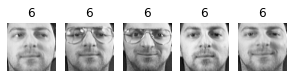

Cluster: 28


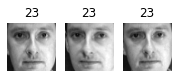

Cluster: 29


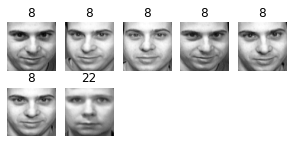

Cluster: 30


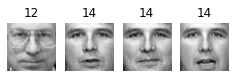

Cluster: 31


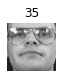

Cluster: 32


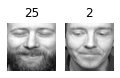

Cluster: 33


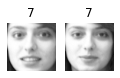

Cluster: 34


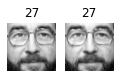

Cluster: 35


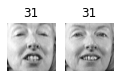

Cluster: 36


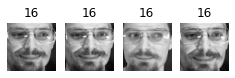

Cluster: 37


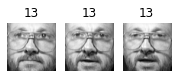

Cluster: 38


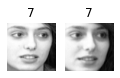

Cluster: 39


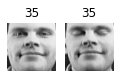

Cluster: 40


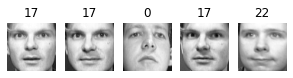

Cluster: 41


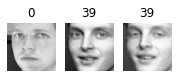

Cluster: 42


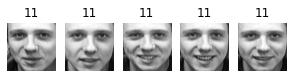

Cluster: 43


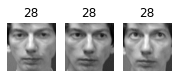

Cluster: 44


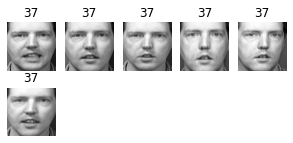

Cluster: 45


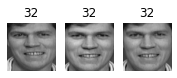

Cluster: 46


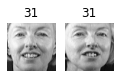

Cluster: 47


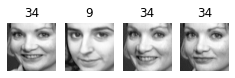

Cluster: 48


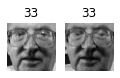

Cluster: 49


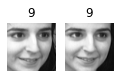

Cluster: 50


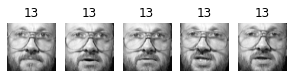

Cluster: 51


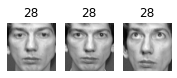

Cluster: 52


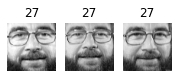

Cluster: 53


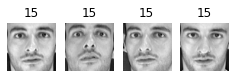

Cluster: 54


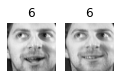

Cluster: 55


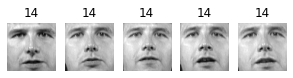

Cluster: 56


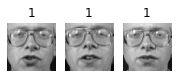

Cluster: 57


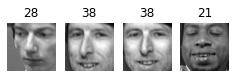

Cluster: 58


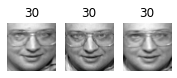

Cluster: 59


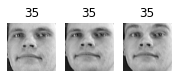

Cluster: 60


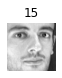

Cluster: 61


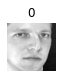

Cluster: 62


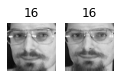

Cluster: 63


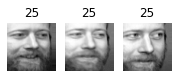

Cluster: 64


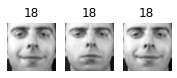

Cluster: 65


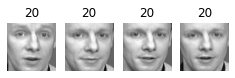

Cluster: 66


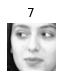

Cluster: 67


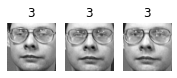

Cluster: 68


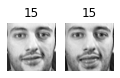

Cluster: 69


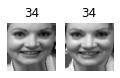

Cluster: 70


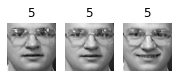

Cluster: 71


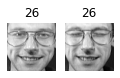

Cluster: 72


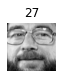

Cluster: 73


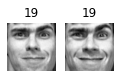

Cluster: 74


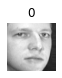

Cluster: 75


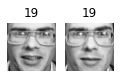

Cluster: 76


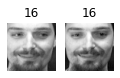

Cluster: 77


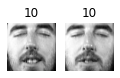

Cluster: 78


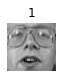

Cluster: 79


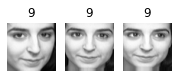

Cluster: 80


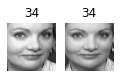

Cluster: 81


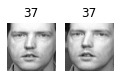

Cluster: 82


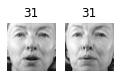

Cluster: 83


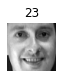

Cluster: 84


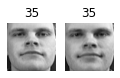

Cluster: 85


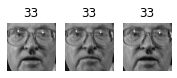

Cluster: 86


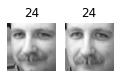

Cluster: 87


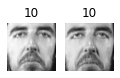

Cluster: 88


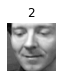

Cluster: 89


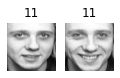

Cluster: 90


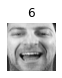

Cluster: 91


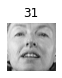

Cluster: 92


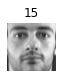

Cluster: 93


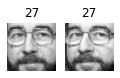

Cluster: 94


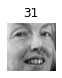

Cluster: 95


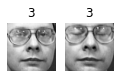

Cluster: 96


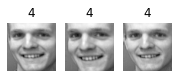

Cluster: 97


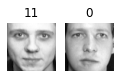

Cluster: 98


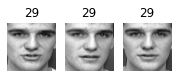

Cluster: 99


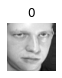

Cluster: 100


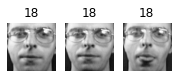

Cluster: 101


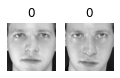

Cluster: 102


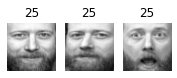

Cluster: 103


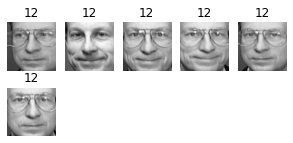

Cluster: 104


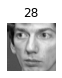

In [14]:
#Visualize the clusters
def plot_faces(faces,labels,n_cols=5):
    faces=faces.reshape(-1,64,64)
    n_rows=(len(faces)-1)//n_cols+1
    plt.figure(figsize=(n_cols,n_rows*1.1))
    for index, (labels,faces) in enumerate(zip(labels,faces)):
        plt.subplot(n_rows,n_cols,index+1)
        plt.imshow(faces, cmap='gray')
        plt.axis("off")
        plt.title(labels)
    plt.show()
    
for cluster_id in np.unique(best_model.labels_):
    print('Cluster:',cluster_id)
    in_cluster=best_model.labels_==cluster_id
    X_train[in_cluster]
    faces=X_train[in_cluster]
    labels=y_train[in_cluster]
    plot_faces(faces,labels)

Assignment Problem 2

In [15]:
#Developing a model
from sklearn.ensemble import RandomForestClassifier

forest_clf=RandomForestClassifier(n_estimators=150,random_state=42)
forest_clf.fit(X_train_pca,y_train)
forest_clf.score(X_valid_pca,y_valid)

0.925

In [16]:
X_train_reduced=best_model.transform(X_train_pca)
X_valid_reduced=best_model.transform(X_valid_pca)
X_test_reduced=best_model.transform(X_test_pca)

forest_clf_reduced=RandomForestClassifier(n_estimators=150,random_state=42)
forest_clf_reduced.fit(X_train_reduced,y_train)
forest_clf_reduced.score(X_valid_reduced,y_valid)

0.8

In [17]:
from sklearn.pipeline import Pipeline

for k in k_range:
    pipeline=Pipeline([
        ('kmeans',KMeans(n_clusters=k,random_state=42)),
        ('forest',RandomForestClassifier(n_estimators=150, random_state=42))
    ])
    pipeline.fit(X_train_pca,y_train)
    print(k,pipeline.score(X_valid_pca,y_valid))

5 0.4125
10 0.475
15 0.6375
20 0.675
25 0.7125
30 0.6625
35 0.7125
40 0.7375
45 0.775
50 0.7125
55 0.7875
60 0.775
65 0.75
70 0.75
75 0.7875
80 0.7875
85 0.775
90 0.7625
95 0.775
100 0.775
105 0.8
110 0.8
115 0.825
120 0.7875
125 0.75
130 0.8125
135 0.7875
140 0.775
145 0.7875


In [18]:
#Combining pca and reduced features together
X_train_extended=np.c_[X_train_pca,X_train_reduced]
X_valid_extended=np.c_[X_valid_pca,X_valid_reduced]
X_test_extended=np.c_[X_test_pca,X_test_reduced]

forest_clf.fit(X_train_extended,y_train)
forest_clf.score(X_valid_extended,y_valid)

0.825

Assignment 3

In [21]:
#fit a GaussianMixture model on the Olivette dataset 
from sklearn.mixture import GaussianMixture

gm=GaussianMixture(n_components=40,random_state=42)
y_pred_gm=gm.fit_predict(X_train_pca,y_train)

In [23]:
#add new faces to the dataset for better performance
n_gen_faces=20
gen_faces_reduced, y_gen_faces=gm.sample(n_samples=n_gen_faces)
gen_faces=pca.inverse_transform(gen_faces_reduced)

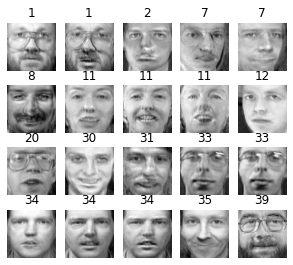

In [24]:
plot_faces(gen_faces,y_gen_faces)

In [30]:
#Rotated pics code
n_rotated=4
rotated=np.transpose(X_train[:n_rotated].reshape(-1,64,64),axes=[0,2,1])            #-1 indicates a change of shape
rotated=rotated.reshape(-1,64*64)
y_rotated=y_train[:n_rotated]

In [39]:
#Flipped pics code
n_flipped=3
flipped=X_train[:n_flipped].reshape(-1,64,64)[:,::-1]
flipped=flipped.reshape(-1,64*64)
y_flipped=y_train[:n_flipped]

In [40]:
#Darkened pics
n_darkened=3
darkened=X_train[:n_darkened].copy()
darkened[:,1:-1]*=0.3
y_darkened=y_train[:n_darkened]

In [41]:
flipped.shape

(3, 4096)

In [53]:
X_bad_faces=np.r_[rotated,flipped,darkened]
y_bad=np.concatenate([y_rotated,y_flipped,y_darkened])

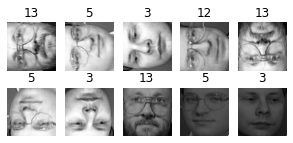

In [44]:
plot_faces(X_bad_faces,y_bad)

In [59]:
#Compare and Detect anamolies
X_bad_faces_pca=pca.transform(X_bad_faces)

In [60]:
gm.score_samples(X_bad_faces_pca)

array([-3.99242682e+07, -5.77528562e+07, -3.28021117e+07, -5.56725663e+07,
       -5.18536458e+07, -3.87745709e+07, -3.80691433e+07, -1.12355852e+08,
       -1.03987957e+08, -1.08535065e+08])

In [48]:
gm.score_samples(X_train_pca[:10])

array([1271.22301433, 1285.35696198, 1228.17953505, 1213.12361815,
       1286.20039776, 1284.91105502, 1213.72161155, 1233.13333576,
       1284.91105413, 1271.22301393])

The bad faces are all considered highly unlikely by the Gaussian Mixture model. Compare this to the scores of some training instances:

Assignment 4

In [49]:
#Find out reconstruction error for the regular samples and for the sample introduced by the program
def reconstruction_error(pca,X):
    X_pca=pca.transform(X)
    X_reconstructed=pca.inverse_transform(X_pca)
    mse=np.square(X_reconstructed,X).mean(axis=-1)
    return mse

In [55]:
reconstruction_error(pca,X_train).mean()

0.037571628

In [56]:
reconstruction_error(pca,X_bad_faces).mean()

0.28140095

Reconstruction error for distorted image is much much higher than the normal images, thus making it clear that these images can be treated as anamolies

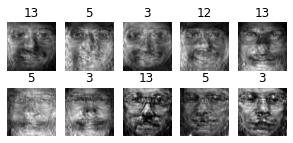

In [58]:
plot_faces(X_bad_faces,y_bad)

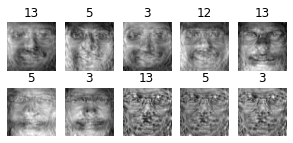

In [61]:
#Reconstructing the bad faces using inverse_transform function
X_bad_faces_reconstructed=pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed,y_bad)

For anamolies reconstructing yields much worst results